Imports:
    Pandas,
    quandl,
    np, 
    mplfinance -> plot graphics

In [1]:
import pandas as pd
import quandl
import numpy as np
import mplfinance as mpf

In [2]:
#Setup Quandl
apiKey="TmwEsGGvzZL-Y9o2o_KZ"
quandl.ApiConfig.api_key = apiKey
df = quandl.get('CHRIS/CME_ES1', start_date='2010-01-01', end_date='2021-03-12')
df.rename(columns={"Last": "Close","Previous Day Open Interest":"Open Interest"},inplace = True)
df.drop(columns=['Change','Settle'],inplace = True)

In [3]:
#Setup Zones
df['C']=(df['Close']+df['Low']+df['High'])/3
df['range']=df['High']-df['Low']
df['D']=df['C']+(df['range']/2)
df['B']=df['C']-(df['range']/2)
df['E']=df['C']+(df['range'])
df['A']=df['C']-(df['range'])
#Shift zones columns
#a['x2'] = a.x2.shift(1)
df['C']=df.C.shift(1)
df['D']=df.D.shift(1)
df['B']=df.B.shift(1)
df['E']=df.E.shift(1)
df['A']=df.A.shift(1)
df['range']=df.range.shift(1)


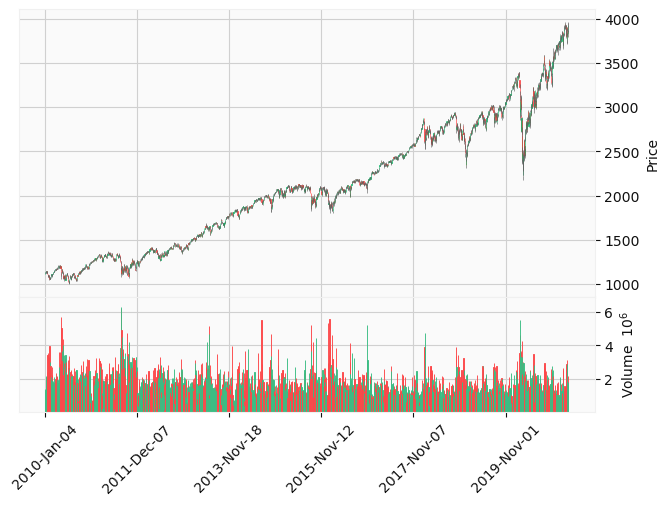

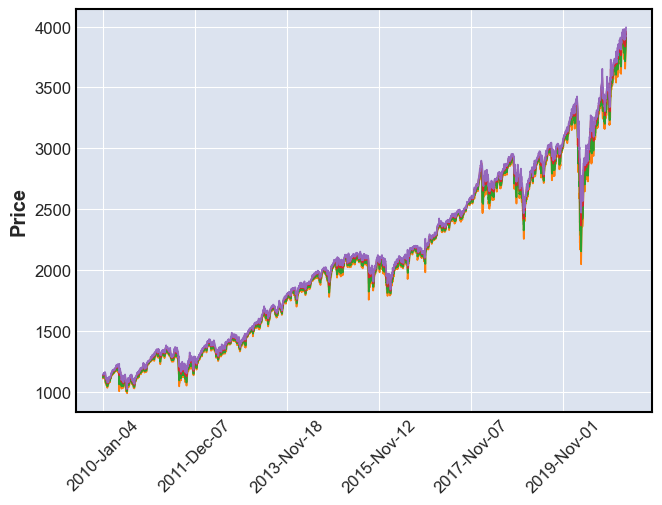

In [4]:
mpf.plot(df, type='candle', style='yahoo', volume=True)
tcdf = df[['C','A','B','D','E']]
apd  = mpf.make_addplot(tcdf)
mpf.plot(df,addplot=apd)

In [5]:
#SET CLOSE AND OPEN ZONES   “>” y “<” 
conditions=[
    (df['Close']<= df['A']),
    (df['Close']<= df['B']) & (df['Close']> df['A']),
    (df['Close']<= df['C']) & (df['Close']> df['B']),
    (df['Close']<= df['D']) & (df['Close']> df['C']),
    (df['Close']<= df['E']) & (df['Close']> df['D']),
    (df['Close']> df['E'])
]
choices=['CL1','CL2','CL3','CL4','CL5','CL6']
df['CLZONE']=np.select(conditions,choices)
conditions=[
    (df['Open']<= df['A']),
    (df['Open']<= df['B']) & (df['Open']> df['A']),
    (df['Open']<= df['C']) & (df['Open']> df['B']),
    (df['Open']<= df['D']) & (df['Open']> df['C']),
    (df['Open']<= df['E']) & (df['Open']> df['D']),
    (df['Open']> df['E'])
]
choices=['OP1','OP2','OP3','OP4','OP5','OP6']
df['OPZONE']=np.select(conditions,choices)
df['CLZONE']=df.CLZONE.shift(1)
df = df.iloc[2:]
df['CLOP']=df['CLZONE']+df['OPZONE']
df.drop(columns=['CLZONE','OPZONE'],inplace = True)
df['CLOP'].value_counts(normalize=True)

CL4OP4    0.207394
CL5OP4    0.162324
CL3OP3    0.135211
CL6OP4    0.095775
CL4OP3    0.091901
CL3OP4    0.082394
CL2OP3    0.082394
CL1OP3    0.079225
CL5OP3    0.011972
CL2OP4    0.010211
CL1OP4    0.004930
CL3OP2    0.004225
CL4OP2    0.003873
CL6OP3    0.003169
CL4OP5    0.002817
CL3OP5    0.002465
CL5OP2    0.002465
CL4OP1    0.002465
CL1OP2    0.002113
CL4OP6    0.002113
CL5OP5    0.002113
CL3OP1    0.002113
CL5OP1    0.001408
CL3OP6    0.001408
CL2OP2    0.001056
CL6OP5    0.001056
CL2OP5    0.000704
CL5OP6    0.000352
CL6OP1    0.000352
Name: CLOP, dtype: float64

In [6]:
# Zones Reached
conditions=[
    (df['Low']<df['A'])
]
choices=[1]
df['Reach1']=np.select(conditions,choices)
conditions=[
    (df['High']>=df['B']) & (df['Low']<=df['A']),
    (df['Low']<df['B']) & (df['Low']>=df['A']),
    (df['High']<df['B']) & (df['High']>=df['A'])
]
choices=[1,1,1]
df['Reach2']=np.select(conditions,choices)
conditions=[
    (df['High']>=df['C']) & (df['Low']<=df['B']),
    (df['Low']<df['C']) & (df['Low']>=df['B']),
    (df['High']<df['C']) & (df['High']>=df['B'])
]
choices=[1,1,1]
df['Reach3']=np.select(conditions,choices)
conditions=[
    (df['High']>=df['D']) & (df['Low']<=df['C']),
    (df['Low']<df['D']) & (df['Low']>=df['C']),
    (df['High']<df['D']) & (df['High']>=df['C'])
]
choices=[1,1,1]
df['Reach4']=np.select(conditions,choices)
conditions=[
    (df['High']>=df['E']) & (df['Low']<=df['D']),
    (df['Low']<df['E']) & (df['Low']>=df['D']),
    (df['High']<df['E']) & (df['High']>=df['D'])
]
choices=[1,1,1]
df['Reach5']=np.select(conditions,choices)
conditions=[
    (df['High']>df['E'])
]
choices=[1]
df['Reach6']=np.select(conditions,choices)

In [7]:
# Zonas como Resistencia:
#

conditions=[
    (df['High']>df['A']) & (df['High']<(df['B']))
]
choices=[1]
df['RES2']=np.select(conditions,choices)
conditions=[
    (df['High']>df['B']) & (df['High']<(df['C']))
]
choices=[1]
df['RES3']=np.select(conditions,choices)
conditions=[
    (df['High']>df['C']) & (df['High']<(df['D']))
]
choices=[1]
df['RES4']=np.select(conditions,choices)
conditions=[
    (df['High']>df['D']) & (df['High']<(df['E']))
]
choices=[1]
df['RES5']=np.select(conditions,choices)
conditions=[
    (df['High']>df['E']) & (df['Close']<(df['E']))
]
choices=[1]
df['RES6']=np.select(conditions,choices)

In [8]:
# Zonas como Soporte:
#

conditions=[
    (df['Low']<(df['A'])) & (df['Close']>df['A'])
]
choices=[1]
df['SUP1']=np.select(conditions,choices)
conditions=[
    (df['Low']<(df['B'])) & (df['Low']>df['A'])
]
choices=[1]
df['SUP2']=np.select(conditions,choices)
conditions=[
    (df['Low']<(df['C'])) & (df['Low']>df['B'])
]
choices=[1]
df['SUP3']=np.select(conditions,choices)
conditions=[
    (df['Low']<(df['D'])) & (df['Low']>df['C'])
]
choices=[1]
df['SUP4']=np.select(conditions,choices)
conditions=[
    (df['Low']<(df['E'])) & (df['Low']>df['D'])
]
choices=[1]
df['SUP5']=np.select(conditions,choices)

In [74]:
# Bandas como zonas de soporte y resistencia
#
conditions=[
       (df['Low'] >= (df['C']-(df['range']*0.618))) & (df['Low']<= df['B'])
]
choices=[1]
df['SB1']=np.select(conditions,choices)
conditions=[
    (df['Low']>=(df['C']-(df['range']*1.382))) & (df['Low']<=df['A']) & (df['Close']>=df['A'])
]
choices=[1]
df['SB2']=np.select(conditions,choices)
conditions=[
    (df['High']<=(df['C']+(df['range']*0.618))) & (df['High']>=df['D']) 
]
choices=[1]
df['RB1']=np.select(conditions,choices)
conditions=[
    (df['High']<=(df['C']+(df['range']*1.382))) & (df['High']>=df['E']) & (df['Close']<=df['E']) 
]
choices=[1]
df['RB2']=np.select(conditions,choices)



In [30]:
df

,Open,High,Low,Close,Volume,Open Interest,C,range,D,B,...,RES6,SUP1,SUP2,SUP3,SUP4,SUP5,SB1,SB2,RB1,RB2
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-06,1132.00,1135.50,1127.25,1133.00,1259921.0,2396493.0,1130.083333,8.00,1134.083333,1126.083333,...,0,0,0,1,0,0,0,0,0,0
2010-01-07,1133.00,1138.75,1127.00,1137.50,1567025.0,2406352.0,1131.916667,8.25,1136.041667,1127.791667,...,0,0,1,0,0,0,1,0,0,0
2010-01-08,1137.25,1141.75,1131.00,1141.50,1527666.0,2420194.0,1134.416667,11.75,1140.291667,1128.541667,...,0,0,0,1,0,0,0,0,0,0
2010-01-11,1141.75,1148.00,1137.75,1142.50,1456443.0,2427453.0,1138.083333,10.75,1143.458333,1132.708333,...,0,0,0,1,0,0,0,0,0,0
2010-01-12,1141.25,1143.00,1127.75,1134.00,2117166.0,2439036.0,1142.750000,10.25,1147.875000,1137.625000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,3854.75,3878.75,3796.25,3829.50,2156644.0,2610871.0,3806.333333,121.50,3867.083333,3745.583333,...,0,0,0,1,0,0,0,0,1,0
2021-03-09,3831.25,3901.25,3826.25,3871.75,1668143.0,2613007.0,3834.833333,82.50,3876.083333,3793.583333,...,0,0,0,1,0,0,0,0,0,0
2021-03-10,3878.50,3916.25,3856.25,3907.75,1817563.0,2577850.0,3866.416667,75.00,3903.916667,3828.916667,...,0,0,0,1,0,0,0,0,0,0


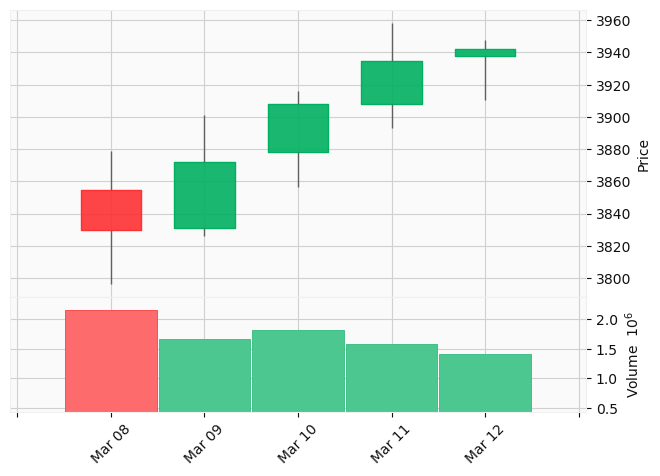

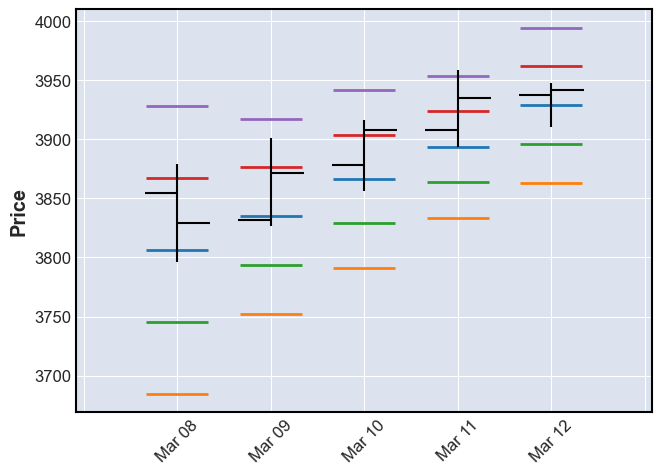

In [92]:
df_subset = df.tail()
mpf.plot(df_subset, type='candle', style='yahoo', volume=True)
tcdf = df_subset[['C','A','B','D','E']]
apd  = mpf.make_addplot(tcdf,type="scatter",marker="_",markersize=2000)
mpf.plot(df_subset,addplot=apd)

In [40]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest', 'C', 'range',
       'D', 'B', 'E', 'A', 'CLOP', 'Reach1', 'Reach2', 'Reach3', 'Reach4',
       'Reach5', 'Reach6', 'RES2', 'RES3', 'RES4', 'RES5', 'RES6', 'SUP1',
       'SUP2', 'SUP3', 'SUP4', 'SUP5', 'SB1', 'SB2', 'RB1', 'RB2'],
      dtype='object')

In [75]:
CLOP_combo=df['CLOP'].sort_values().unique()
prob=pd.DataFrame(index=CLOP_combo,columns=['count','Reach1','Reach2','Reach3','Reach4','Reach5','Reach6','RES2','RES3','RES4','RES5','RES6','SUP1','SUP2','SUP3','SUP4','SUP5', 'SB1', 'SB2', 'RB1', 'RB2'])
for i in CLOP_combo:
    data=df[df['CLOP']==i]
    probs_raw=data[['Reach1','Reach2','Reach3','Reach4','Reach5','Reach6','RES2','RES3','RES4','RES5','RES6','SUP1','SUP2','SUP3','SUP4','SUP5','SB1', 'SB2', 'RB1', 'RB2']]
    prob.loc[i,"count"]=data.shape[0]
    for c in probs_raw.columns:
        aux=probs_raw[c].value_counts(normalize=True)     
        if(1 in aux.index):
            prob.loc[i,c]=aux[1]*100.0
        else:
            prob.loc[i,c]=0.0
        if((c in ['RES1','SUP1','SB2']) & (prob.loc[i,'Reach1']!= 0)):
            prob.loc[i,c]=prob.loc[i,c]/prob.loc[i,'Reach1']*100.0
        if((c in ['RES2','SUP2','SB1']) & (prob.loc[i,'Reach2']!= 0)):
            prob.loc[i,c]=prob.loc[i,c]/prob.loc[i,'Reach2']*100.0
        if((c in ['RES3','SUP3']) & (prob.loc[i,'Reach3']!= 0)):
            prob.loc[i,c]=prob.loc[i,c]/prob.loc[i,'Reach3']*100.0
        if((c in ['RES4','SUP4']) & (prob.loc[i,'Reach4']!= 0)):
            prob.loc[i,c]=prob.loc[i,c]/prob.loc[i,'Reach4']*100.0
        if((c in ['RES5','SUP5','RB1']) & (prob.loc[i,'Reach5']!= 0)):
            prob.loc[i,c]=prob.loc[i,c]/prob.loc[i,'Reach5']*100.0
        if((c in ['RES6','SUP6','RB2']) & (prob.loc[i,'Reach6']!= 0)):
            prob.loc[i,c]=prob.loc[i,c]/prob.loc[i,'Reach6']*100.0
prob.round(2)
prob

,count,Reach1,Reach2,Reach3,Reach4,Reach5,Reach6,RES2,RES3,RES4,...,RES6,SUP1,SUP2,SUP3,SUP4,SUP5,SB1,SB2,RB1,RB2
CL1OP2,6,50,100,83.3333,16.6667,0,0,16.6667,80,100,...,0,66.6667,50,0,0,0,0,33.3333,0,0
CL1OP3,225,14.6667,59.5556,100,69.7778,10.2222,1.77778,0,30.2222,84.7134,...,50,39.3939,75.3731,40.4444,0,0,29.1045,33.3333,30.4348,50
CL1OP4,14,7.14286,42.8571,85.7143,100,28.5714,0,0,0,71.4286,...,0,0,83.3333,50,14.2857,0,33.3333,0,0,0
CL2OP2,3,66.6667,100,66.6667,33.3333,33.3333,0,33.3333,50,0,...,0,0,33.3333,0,0,0,0,0,100,0
CL2OP3,234,17.9487,57.265,100,84.6154,26.4957,5.55556,0,15.3846,67.1717,...,30.7692,35.7143,68.6567,42.735,0,0,29.1045,30.9524,24.1935,30.7692
CL2OP4,29,17.2414,37.931,79.3103,100,65.5172,20.6897,0,0,34.4828,...,50,60,54.5455,52.1739,20.6897,0,27.2727,40,21.0526,33.3333
CL2OP5,2,0,50,50,100,100,50,0,0,0,...,0,0,100,0,50,0,0,0,0,0
CL3OP1,6,100,50,33.3333,33.3333,16.6667,16.6667,33.3333,0,50,...,0,16.6667,0,0,0,0,0,0,0,0
CL3OP2,12,66.6667,100,75,50,33.3333,16.6667,25,33.3333,33.3333,...,50,62.5,33.3333,0,0,0,0,37.5,50,0
CL3OP3,384,32.0312,66.6667,100,84.6354,39.8438,13.0208,0,15.3646,52.9231,...,48,54.4715,51.9531,33.3333,0,0,17.1875,36.5854,18.3007,42


In [76]:
prob_strict=pd.DataFrame(index=CLOP_combo,columns=['RB1_s','RB2_s','SB1_s','SB2_s'])

prob_strict['RB1_s'] = np.divide(prob['RB1'], prob['RES5'], out=np.zeros_like(prob['RB1']), where=prob['RES5']!=0)
prob_strict['RB2_s'] = np.divide(prob['RB2'], prob['RES6'], out=np.zeros_like(prob['RB2']), where=prob['RES6']!=0)
prob_strict['SB1_s'] = np.divide(prob['SB1'], prob['SUP2'], out=np.zeros_like(prob['SB1']), where=prob['SUP2']!=0)
prob_strict['SB2_s'] = np.divide(prob['SB2'], prob['SUP1'], out=np.zeros_like(prob['SB2']), where=prob['SUP1']!=0)
prob_strict

,RB1_s,RB2_s,SB1_s,SB2_s
CL1OP2,0,0,0,0.5
CL1OP3,0.368421,1,0.386139,0.846154
CL1OP4,0,0,0.4,0
CL2OP2,1,0,0,0
CL2OP3,0.3125,1,0.423913,0.866667
CL2OP4,0.307692,0.666667,0.5,0.666667
CL2OP5,0,0,0,0
CL3OP1,0,0,0,0
CL3OP2,1,0,0,0.6
CL3OP3,0.27451,0.875,0.330827,0.671642


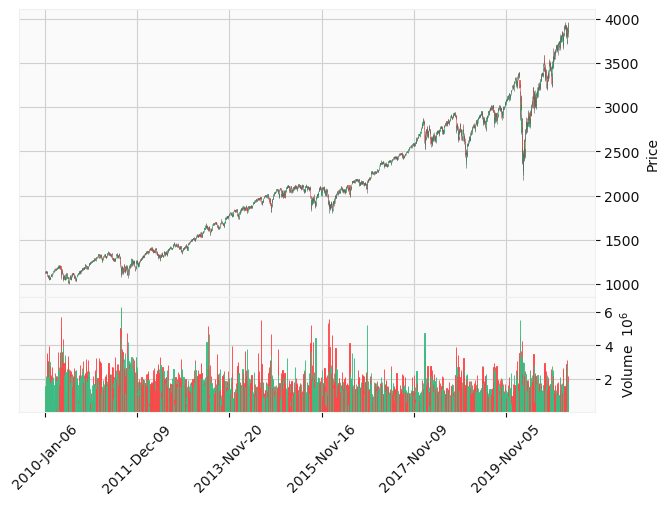

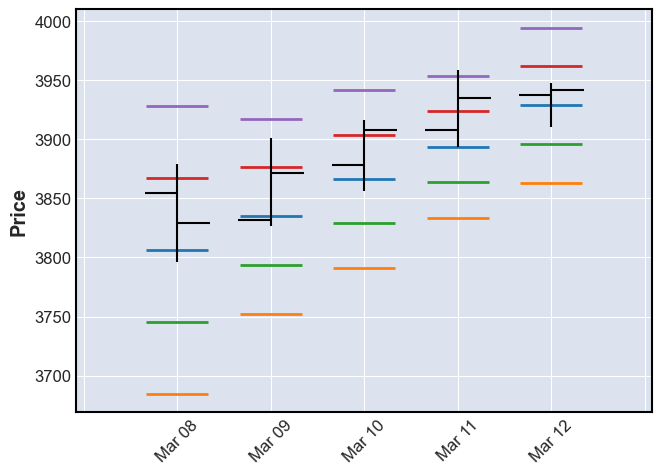

In [100]:
df_subset = df.tail()
mpf.plot(df, type='candle', style='yahoo', volume=True)
tcdf = df_subset[['C','A','B','D','E']]
apd  = mpf.make_addplot(tcdf,type="scatter",marker="_",markersize=2000)
mpf.plot(df_subset,addplot=apd)